In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

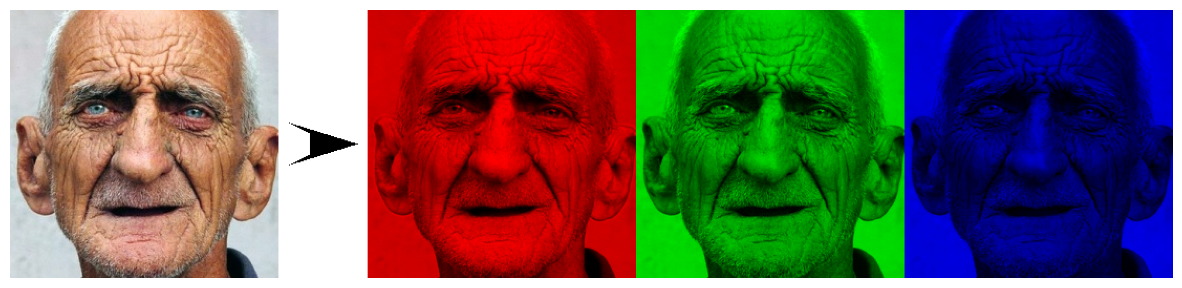

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

image_path = "processed_faces/white_men/resized_faces/90_90_0_0_20170111210753614.jpg"  
image = Image.open(image_path)

image_array = np.array(image)
red_channel = image_array.copy()
green_channel = image_array.copy()
blue_channel = image_array.copy()

red_channel[:, :, 1:] = 0  
green_channel[:, :, [0, 2]] = 0 
blue_channel[:, :, :2] = 0  

arrow_width = image_array.shape[1] // 3  
arrow_height = image_array.shape[0]      
arrow = np.ones((arrow_height, arrow_width, 3), dtype=np.uint8) * 255  
arrow_img = Image.fromarray(arrow)

draw = ImageDraw.Draw(arrow_img)
arrow_center_y = arrow_height // 2
arrow_tip_x = arrow_width - 10
arrow_tail_x = 10
draw.polygon(
    [(arrow_tail_x, arrow_center_y - 20),  
     (arrow_tip_x, arrow_center_y),       
     (arrow_tail_x, arrow_center_y + 20), 
     (arrow_tail_x + 20, arrow_center_y + 10),  
     (arrow_tail_x + 20, arrow_center_y - 10)],  
    fill=(0, 0, 0)
)
arrow = np.array(arrow_img)

row_images = [image_array, arrow, red_channel, green_channel, blue_channel]
combined_row = np.hstack(row_images)

plt.figure(figsize=(15, 5))
plt.imshow(combined_row)
plt.axis("off")
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = r"C:\Users\peter\Desktop\Studia II stopień\SIIUM\II sem\AOC\3rdattempt\all_faces\90_0_0_20170111210753614.jpg"
image = cv2.imread(image_path)

if image is not None:
    plt.imshow(image)  
    plt.axis("off")
    plt.show()
else:
    print("Nie można wczytać obrazu.")


Nie można wczytać obrazu.


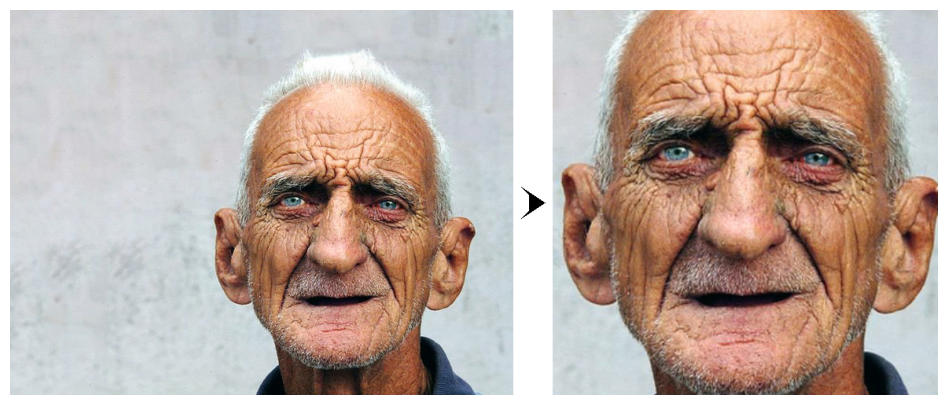

In [ ]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

image_path = "all_faces/90_0_0_20170111210753614.jpg"  
haarcascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"  

image = cv2.imread(image_path)
if image is None:
    print("Nie można wczytać obrazu. Sprawdź, czy ścieżka do pliku jest poprawna.")
    exit()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_cascade = cv2.CascadeClassifier(haarcascade_path)

faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) == 0:
    print("Nie wykryto twarzy.")
    exit()

x, y, w, h = faces[0]
face = image_rgb[y:y + h, x:x + w]
face = cv2.resize(face, (int(face.shape[1] * image_rgb.shape[0] / face.shape[0]), image_rgb.shape[0]))  # Przeskalowanie twarzy


arrow_width = 50  
arrow_height = image_rgb.shape[0] 
arrow = np.ones((arrow_height, arrow_width, 3), dtype=np.uint8) * 255  
arrow_img = Image.fromarray(arrow)

draw = ImageDraw.Draw(arrow_img)
arrow_center_y = arrow_height // 2
arrow_tip_x = arrow_width - 10
arrow_tail_x = 10
draw.polygon(
    [(arrow_tail_x, arrow_center_y - 20),  
     (arrow_tip_x, arrow_center_y),       
     (arrow_tail_x, arrow_center_y + 20), 
     (arrow_tail_x + 10, arrow_center_y + 10),  
     (arrow_tail_x + 10, arrow_center_y - 10)],  
    fill=(0, 0, 0)
)
arrow = np.array(arrow_img)

row_images = [image_rgb, arrow, face]
combined_row = np.hstack(row_images)

plt.figure(figsize=(15, 5))
plt.imshow(combined_row)
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from LocalBinaryPattern import LBP as LocBinPat

lbp = LocBinPat()

image_path = "processed_faces/white_men/resized_faces/90_90_0_0_20170111210753614.jpg"

image = lbp.get_RGB(image_path)

lbp_red = lbp.get_LBP(image, 0)  
lbp_green = lbp.get_LBP(image, 1)  
lbp_blue = lbp.get_LBP(image, 2)  

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(lbp_red, cmap='Reds')
axes[0].axis("off")

axes[1].imshow(lbp_green, cmap='Greens')
axes[1].axis("off")

axes[2].imshow(lbp_blue, cmap='Blues')
axes[2].axis("off")

plt.tight_layout()
plt.show()


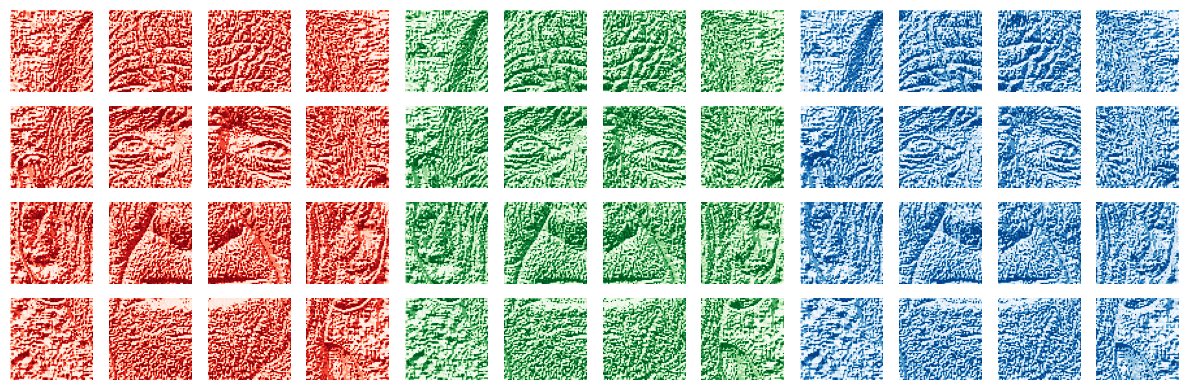

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lbp = LocBinPat()

image_path = "processed_faces/white_men/resized_faces/90_90_0_0_20170111210753614.jpg"

image = lbp.get_RGB(image_path)

lbp_red = lbp.get_LBP(image, 0)  # Kanał czerwony
lbp_green = lbp.get_LBP(image, 1)  # Kanał zielony
lbp_blue = lbp.get_LBP(image, 2)  # Kanał niebieski

def split_image(image, rows=4, cols=4):
    h, w = image.shape
    patch_h, patch_w = h // rows, w // cols  # Obliczamy wielkość każdej części
    patches = []
    
    for i in range(rows):
        for j in range(cols):
            patch = image[i * patch_h:(i + 1) * patch_h, j * patch_w:(j + 1) * patch_w]
            patches.append(patch)
    
    return patches

red_patches = split_image(lbp_red)
green_patches = split_image(lbp_green)
blue_patches = split_image(lbp_blue)

fig, axes = plt.subplots(4, 12, figsize=(12, 4))  # Zmniejszenie wysokości proporcjonalnie do liczby wierszy

for i in range(4):
    for j in range(4):
        index = i * 4 + j
        axes[i, j].imshow(red_patches[index], cmap="Reds")
        axes[i, j].axis("off")

        axes[i, j + 4].imshow(green_patches[index], cmap="Greens")
        axes[i, j + 4].axis("off")

        axes[i, j + 8].imshow(blue_patches[index], cmap="Blues")
        axes[i, j + 8].axis("off")

plt.tight_layout()
plt.show()
